# Problem Statement

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\\Users\kmmoh\Downloads\daily-total-female-births-CA.csv')

In [3]:
df.shape

(365, 2)

In [4]:
df.head(2)

,date,births
0,1959-01-01,35
1,1959-01-02,32


In [5]:
df=pd.read_csv(r'C:\\Users\kmmoh\Downloads\daily-total-female-births-CA.csv',index_col=0,parse_dates=[0])

In [6]:
df.head(2)

,births
date,
1959-01-01,35
1959-01-02,32


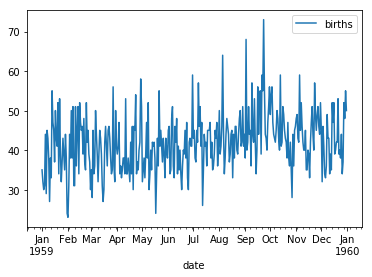

In [7]:
df.plot()


In [13]:
# also called as smoothing
moving_average=df.rolling(window=20).mean()  # window: This is the number of observations used for calculating the statistic. 
moving_average

,births
date,
1959-01-01,NaN
1959-01-02,NaN
1959-01-03,NaN
1959-01-04,NaN
1959-01-05,NaN
1959-01-06,NaN
1959-01-07,NaN
1959-01-08,NaN
1959-01-09,NaN


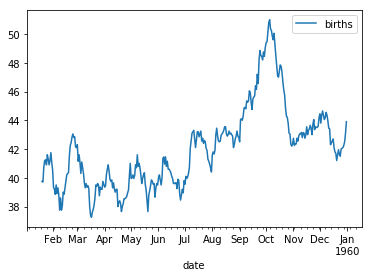

In [14]:
moving_average.plot()

In [18]:
sm.stats.durbin_watson(df) # very less correlation

array([0.04624491])

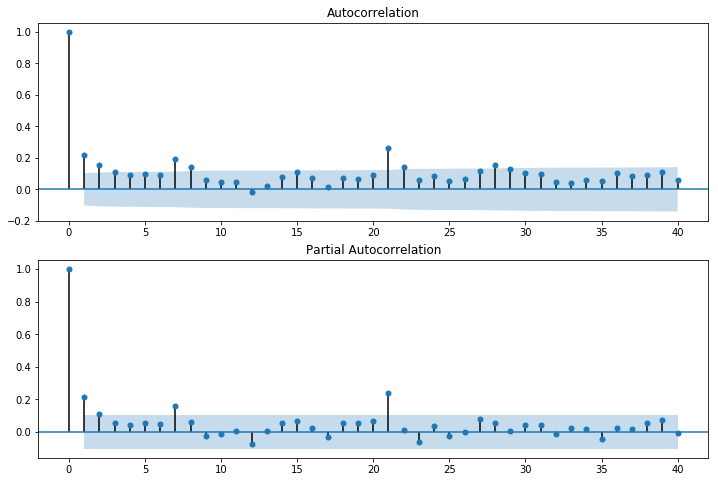

In [17]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df, lags=40, ax=ax2)


In [19]:
x_train=df[0:320]
x_test=df[320:]


In [20]:
from sklearn.model_selection import train_test_split
x_train ,x_test=train_test_split(df)


In [26]:
from statsmodels.tsa.arima_model import ARIMA
arima=ARIMA(x_train,order=(2,1,3))


C:\Users\kmmoh\gv\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\kmmoh\gv\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [31]:
model=arima.fit()
model.aic

C:\Users\kmmoh\gv\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1872.4653660185215

In [29]:
pred= model.forecast(steps=10)[0]
pred

array([41.9998608 , 41.52245176, 41.80912706, 41.95312976, 41.51233588,
       41.8540754 , 41.90188653, 41.5135561 , 41.89092124, 41.84855892])